In [1]:
import sympy as sp
import matplotlib.pyplot as plt

In [2]:
x = sp.Symbol("x")
a = sp.Symbol("a")

In [3]:
def Legendre(i_arg, x, bound):
    a_arg, b_arg = bound
    a, b, x, i, m, k = sp.symbols(("a", "b", "x", "i", "m", "k"))
    polinomial_Legendre = sp.sympify(sp.sqrt((2*i+1)/(b-a))*sp.Sum(sp.Sum(((-1)**(i-m-k))/(2**(i-k))*sp.binomial(i, m)*sp.binomial(2*i-2*m, i)*sp.binomial(i-2*m, i-2*m-k)*((b+a)**(i-2*m-k))/((b-a)**(i-2*m))*(x**k), (k, 0, i - 2*m)), (m, 0, i//2)))
    polinomial_Legendre = polinomial_Legendre.subs([(i, i_arg), (a, a_arg), (b, b_arg)])
    return sp.simplify(polinomial_Legendre.doit())

In [4]:
def trigonometric_functions(i_arg, x, a_arg):
    a, x, i = sp.symbols(("a", "x", "i"))
    if i_arg == 0:
        S = sp.sympify(sp.sqrt(1/2/a))
    elif i_arg % 2 == 0:
        S = sp.sympify(sp.sqrt(1/a)*sp.cos(i*sp.pi/2/a*x))
    else:
        S = sp.sympify(sp.sqrt(1/a)*sp.sin((i+1)*sp.pi/2/a*x))
    S = S.subs([(i, i_arg), (a, a_arg)])
    return S

In [5]:
def sign(x):
    if x < 0:
        return -1
    else:
        return 1

def Rademacher_(k, x):
    return sign(sp.sin((2**k)*sp.pi*x))
             
def Rademacher(k_arg, x):
    k, x = sp.symbols(("k", "x"))
    r = sp.sympify(sp.sign(sp.sin((2**k)*sp.pi*x)))
    r = r.subs(k, k_arg)
    return r.doit()

def Walsh(i, x):
    x = sp.symbols("x")
    binary = bin(i)[:1:-1]
    Omega = sp.sympify(1)
    for i in range(len(binary)):
        if binary[i] == "1":
            Omega = sp.sympify(Omega * Rademacher(i + 1, x))
    return Omega

def Walsh_(i, x):
    binary = bin(i)[:1:-1]
    Omega = 1
    for i in range(len(binary)):
        if binary[i] == "1":
            Omega = Omega * Rademacher_(i + 1, x)
    return Omega

In [6]:
def Hermit(i_arg, x):
    k, x, i = sp.symbols(("k", "x", "i"))
    Phi = sp.sympify(sp.E**(-x**2/2)*sp.sqrt(sp.factorial(i)/(2**i)/sp.sqrt(sp.pi))*sp.Sum((-1)**k*(2*x)**(i-2*k)/sp.factorial(k)/sp.factorial(i-2*k), (k, 0, i//2)))
    Phi = Phi.subs(i, i_arg)
    return sp.simplify(Phi.doit())

In [13]:
Hermit(3, x)

sqrt(3)*x*(2*x**2 - 3)*exp(-x**2/2)/(3*pi**(1/4))

In [21]:
trigonometric_functions(3, x, a)

sqrt(1/a)*sin(2*pi*x/a)

In [30]:
Walsh(9, x)
#Rademacher(1, x)

sign(sin(2*pi*x))*sign(sin(16*pi*x))

In [101]:
Legendre(1, x, (0, 1))

sqrt(3)*(2*x - 1)

In [42]:
f = sp.simplify(sp.sympify(input()))
a = sp.sympify(input())
b = sp.sympify(input())

e**(x**2)
0
1


In [43]:
h = []
n = 20

for i in range(n):
    h.append(sp.simplify(sp.integrate(f * trigonometric_functions(i, x, b), (x, a, b))))
print(h)

#i = s.Symbol("i")
#sp.simplify(sp.integrate(f * trigonometric_functions(i, x, a), (x, a, b)))

[0.707106781186548*Integral(e**(x**2), (x, 0, 1)), Integral(e**(x**2)*sin(pi*x), (x, 0, 1)), Integral(e**(x**2)*cos(pi*x), (x, 0, 1)), Integral(e**(x**2)*sin(2*pi*x), (x, 0, 1)), Integral(e**(x**2)*cos(2*pi*x), (x, 0, 1)), Integral(e**(x**2)*sin(3*pi*x), (x, 0, 1)), Integral(e**(x**2)*cos(3*pi*x), (x, 0, 1)), Integral(e**(x**2)*sin(4*pi*x), (x, 0, 1)), Integral(e**(x**2)*cos(4*pi*x), (x, 0, 1)), Integral(e**(x**2)*sin(5*pi*x), (x, 0, 1)), Integral(e**(x**2)*cos(5*pi*x), (x, 0, 1)), Integral(e**(x**2)*sin(6*pi*x), (x, 0, 1)), Integral(e**(x**2)*cos(6*pi*x), (x, 0, 1)), Integral(e**(x**2)*sin(7*pi*x), (x, 0, 1)), Integral(e**(x**2)*cos(7*pi*x), (x, 0, 1)), Integral(e**(x**2)*sin(8*pi*x), (x, 0, 1)), Integral(e**(x**2)*cos(8*pi*x), (x, 0, 1)), Integral(e**(x**2)*sin(9*pi*x), (x, 0, 1)), Integral(e**(x**2)*cos(9*pi*x), (x, 0, 1)), Integral(e**(x**2)*sin(10*pi*x), (x, 0, 1))]


In [44]:
f1 = sp.sympify(0)

for i in range(len(h)):
    f1 += h[i] * trigonometric_functions(i, x, b)
f1

sin(pi*x)*Integral(e**(x**2)*sin(pi*x), (x, 0, 1)) + sin(2*pi*x)*Integral(e**(x**2)*sin(2*pi*x), (x, 0, 1)) + sin(3*pi*x)*Integral(e**(x**2)*sin(3*pi*x), (x, 0, 1)) + sin(4*pi*x)*Integral(e**(x**2)*sin(4*pi*x), (x, 0, 1)) + sin(5*pi*x)*Integral(e**(x**2)*sin(5*pi*x), (x, 0, 1)) + sin(6*pi*x)*Integral(e**(x**2)*sin(6*pi*x), (x, 0, 1)) + sin(7*pi*x)*Integral(e**(x**2)*sin(7*pi*x), (x, 0, 1)) + sin(8*pi*x)*Integral(e**(x**2)*sin(8*pi*x), (x, 0, 1)) + sin(9*pi*x)*Integral(e**(x**2)*sin(9*pi*x), (x, 0, 1)) + sin(10*pi*x)*Integral(e**(x**2)*sin(10*pi*x), (x, 0, 1)) + cos(pi*x)*Integral(e**(x**2)*cos(pi*x), (x, 0, 1)) + cos(2*pi*x)*Integral(e**(x**2)*cos(2*pi*x), (x, 0, 1)) + cos(3*pi*x)*Integral(e**(x**2)*cos(3*pi*x), (x, 0, 1)) + cos(4*pi*x)*Integral(e**(x**2)*cos(4*pi*x), (x, 0, 1)) + cos(5*pi*x)*Integral(e**(x**2)*cos(5*pi*x), (x, 0, 1)) + cos(6*pi*x)*Integral(e**(x**2)*cos(6*pi*x), (x, 0, 1)) + cos(7*pi*x)*Integral(e**(x**2)*cos(7*pi*x), (x, 0, 1)) + cos(8*pi*x)*Integral(e**(x**2)*cos(8*

TypeError: can't convert expression to float

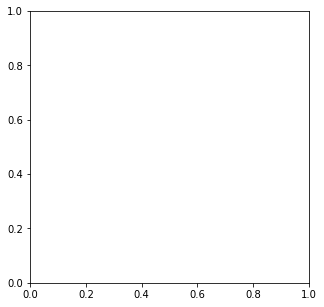

In [45]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))
plt.plot([i/100 for i in range(0, 101)], [f.subs(x, i/100) for i in range(0, 101)])
plt.plot([i/100 for i in range(0, 101)], [f1.subs(x, i/100) for i in range(0, 101)])
plt.show()

In [49]:
"""С данной системой функций проблемы при интегрировании"""

h = []
n = 1

for i in range(n):
    h.append(sp.simplify(sp.integrate(f * Hermit(i, x), (x, a, b))))
print(h)


[Integral(e**(x**2)*exp(-x**2/2), (x, 0, 1))/pi**(1/4)]


In [35]:
f1 = sp.sympify(0)

for i in range(len(h)):
    f1 += h[i] * Hermit(i, x)
f1

x*(2*x**2 - 3)*(63*sin(5) + 185*cos(5))*exp(-x**2/2)/(1875*sqrt(pi)) - 19*x*(191*sin(5) + 45*cos(5))*(4*x**4 - 20*x**2 + 15)*exp(-x**2/2)/(187500*sqrt(pi)) + x*(807961*sin(5) - 381305*cos(5))*(8*x**6 - 84*x**4 + 210*x**2 - 105)*exp(-x**2/2)/(196875000*sqrt(pi)) + x*(185767295*cos(5) - 188768259*sin(5))*(16*x**8 - 288*x**6 + 1512*x**4 - 2520*x**2 + 945)*exp(-x**2/2)/(354375000000*sqrt(pi)) + x*(9410100271*sin(5) - 15218682855*cos(5))*(32*x**10 - 880*x**8 + 7920*x**6 - 27720*x**4 + 34650*x**2 - 10395)*exp(-x**2/2)/(194906250000000*sqrt(pi)) + x*(6647496628885*cos(5) - 2379007925177*sin(5))*(64*x**12 - 2496*x**10 + 34320*x**8 - 205920*x**6 + 540540*x**4 - 540540*x**2 + 135135)*exp(-x**2/2)/(760134375000000000*sqrt(pi)) + x*(-658422187529465*cos(5) + 101087886417993*sin(5))*(128*x**14 - 6720*x**12 + 131040*x**10 - 1201200*x**8 + 5405400*x**6 - 11351340*x**4 + 9459450*x**2 - 2027025)*exp(-x**2/2)/(798141093750000000000*sqrt(pi)) + x*(3981941009314933*sin(5) + 380849437350013335*cos(5))*(256

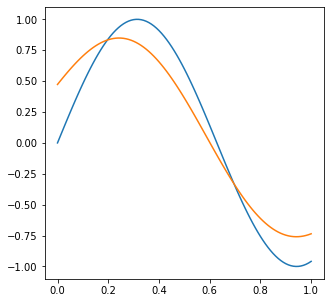

In [36]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))
plt.plot([i/100 for i in range(0, 101)], [f.subs(x, i/100) for i in range(0, 101)])
plt.plot([i/100 for i in range(0, 101)], [f1.subs(x, i/100) for i in range(0, 101)])
plt.show()

In [86]:
h = []
k = 50

for i in range(k):
    n = 2**len(bin(i)[:1:-1])
    a = 0
    for j in range(n):
        a += sp.simplify(sp.integrate(f * Walsh(i, x).subs(x, (2 * j + 1) / (2 * n)), (x, j / n, (j + 1) / n)))
    h.append(a)
print(h)

#i = s.Symbol("i")
#sp.simplify(sp.integrate(f * trigonometric_functions(i, x, a), (x, a, b)))

[0.143267562907355, 0.577189883311419, 0.138369788851589, -0.311085124986577, 0.0619630485037270, -0.139306295458801, -0.0333959122390424, -0.134543942098018, 0.0302126559203182, -0.0679245659125013, -0.0162835630264808, -0.0656024828818118, -0.00729190391918245, -0.0293772929951534, -0.00704262140813962, 0.0158333316771489, 0.0150137497799817, -0.0337541472425913, -0.00809188511764477, -0.0326002210971024, -0.00362360797246700, -0.0145986280519558, -0.00349973057303576, 0.00786814905022310, -0.00176684045581913, -0.00711816698650518, -0.00170643888850274, 0.00383644261740714, -0.000764156370364717, 0.00171798831202334, 0.000411853511049654, 0.00165925681403454, 0.00749540864565778, -0.0168512950313224, -0.00403976265485191, -0.0162752132306997, -0.00180903657802490, -0.00728816481684440, -0.00174719248548962, 0.00392806549200665, -0.000882070863183277, -0.00355364723361939, -0.000851916209182249, 0.00191529135522336, -0.000381494586562418, 0.000857682100460236, 0.000205612216315317, 0

In [87]:
f1 = sp.sympify(0)

for i in range(len(h)):
    f1 += h[i] * Walsh(i, x)
f1

0.00165925681403454*sign(sin(2*pi*x))*sign(sin(4*pi*x))*sign(sin(8*pi*x))*sign(sin(16*pi*x))*sign(sin(32*pi*x)) + 0.000828361205663892*sign(sin(2*pi*x))*sign(sin(4*pi*x))*sign(sin(8*pi*x))*sign(sin(16*pi*x))*sign(sin(64*pi*x)) + 0.0158333316771489*sign(sin(2*pi*x))*sign(sin(4*pi*x))*sign(sin(8*pi*x))*sign(sin(16*pi*x)) + 0.0078681490502231*sign(sin(2*pi*x))*sign(sin(4*pi*x))*sign(sin(8*pi*x))*sign(sin(32*pi*x)) + 0.00392806549200665*sign(sin(2*pi*x))*sign(sin(4*pi*x))*sign(sin(8*pi*x))*sign(sin(64*pi*x)) - 0.134543942098018*sign(sin(2*pi*x))*sign(sin(4*pi*x))*sign(sin(8*pi*x)) + 0.00383644261740714*sign(sin(2*pi*x))*sign(sin(4*pi*x))*sign(sin(16*pi*x))*sign(sin(32*pi*x)) + 0.00191529135522336*sign(sin(2*pi*x))*sign(sin(4*pi*x))*sign(sin(16*pi*x))*sign(sin(64*pi*x)) - 0.0656024828818118*sign(sin(2*pi*x))*sign(sin(4*pi*x))*sign(sin(16*pi*x)) - 0.0326002210971024*sign(sin(2*pi*x))*sign(sin(4*pi*x))*sign(sin(32*pi*x)) - 0.0162752132306997*sign(sin(2*pi*x))*sign(sin(4*pi*x))*sign(sin(64*pi*

In [90]:
f2 = []

for j in range(0, 1001):
    a = 0
    for i in range(len(h)):
        a += h[i] * Walsh_(i, j/1000)
    f2.append(a)
f2

[0.0373125438613210,
 0.0373125438613210,
 0.0373125438613210,
 0.0373125438613210,
 0.0373125438613210,
 0.0373125438613210,
 0.0373125438613210,
 0.0373125438613210,
 0.0373125438613210,
 0.0373125438613210,
 0.0373125438613210,
 0.0373125438613210,
 0.0373125438613210,
 0.0373125438613210,
 0.0373125438613210,
 0.0373125438613210,
 0.118619823287838,
 0.118619823287838,
 0.118619823287838,
 0.118619823287838,
 0.118619823287838,
 0.118619823287838,
 0.118619823287838,
 0.118619823287838,
 0.118619823287838,
 0.118619823287838,
 0.118619823287838,
 0.118619823287838,
 0.118619823287838,
 0.118619823287838,
 0.118619823287838,
 0.118619823287838,
 0.195753843281471,
 0.195753843281471,
 0.195753843281471,
 0.195753843281471,
 0.195753843281471,
 0.195753843281471,
 0.195753843281471,
 0.195753843281471,
 0.195753843281471,
 0.195753843281471,
 0.195753843281471,
 0.195753843281471,
 0.195753843281471,
 0.195753843281471,
 0.195753843281471,
 0.268244054552766,
 0.268244054552766,
 0.2

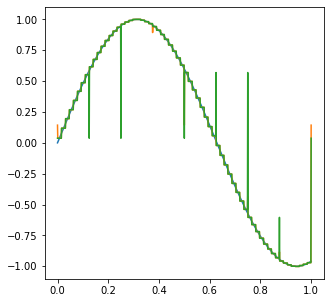

In [91]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))
plt.plot([i/1000 for i in range(0, 1001)], [f.subs(x, i/1000) for i in range(0, 1001)])
plt.plot([i/1000 for i in range(0, 1001)], [f1.subs(x, i/1000) for i in range(0, 1001)])
plt.plot([i/1000 for i in range(0, 1001)], f2)
plt.show()

In [80]:
print(f1.subs(x, 0.5), f2[75], f1.subs(x, 0), f2[-1])

0.0909090909090909 0.00113177085521542 0.0909090909090909 4.52244613285968e-9


In [32]:
print(sum(h))

-5.44792409610528e-5


In [94]:
h = []
n = 10

for i in range(n):
    h.append(sp.simplify(sp.integrate(f * Legendre(i, x, (a, b)), (x, a, b))))
print(h)

#i = s.Symbol("i")
#sp.simplify(sp.integrate(f * trigonometric_functions(i, x, a), (x, a, b)))

[1/5 - cos(5)/5, sqrt(3)*(-5 + 2*sin(5) - 5*cos(5))/25, sqrt(5)*(30*sin(5) - 13*cos(5) + 13)/125, sqrt(7)*(36*sin(5) + 35*cos(5) + 35)/125, -1317/625 + 1317*cos(5)/625 - 204*sin(5)/125, -sqrt(11)*(7002*sin(5) + 5245*cos(5) + 5245)/3125, sqrt(13)*(106890*sin(5) - 143069*cos(5) + 143069)/15625, sqrt(15)*(3544744*sin(5) + 2648015*cos(5) + 2648015)/78125, sqrt(17)*(-20553119 + 20553119*cos(5) - 15353640*sin(5))/78125, -sqrt(19)*(681082326*sin(5) + 508783685*cos(5) + 508783685)/390625]


In [95]:
f1 = sp.sympify(0)

for i in range(len(h)):
    f1 += h[i] * Legendre(i, x, (a, b))
f1

3*(2*x - 1)*(-5 + 2*sin(5) - 5*cos(5))/25 + (6*x**2 - 6*x + 1)*(30*sin(5) - 13*cos(5) + 13)/25 + 7*(36*sin(5) + 35*cos(5) + 35)*(20*x**3 - 30*x**2 + 12*x - 1)/125 + (-1317/625 + 1317*cos(5)/625 - 204*sin(5)/125)*(210*x**4 - 420*x**3 + 270*x**2 - 60*x + 3) - 11*(7002*sin(5) + 5245*cos(5) + 5245)*(252*x**5 - 630*x**4 + 560*x**3 - 210*x**2 + 30*x - 1)/3125 + 13*(106890*sin(5) - 143069*cos(5) + 143069)*(924*x**6 - 2772*x**5 + 3150*x**4 - 1680*x**3 + 420*x**2 - 42*x + 1)/15625 + 3*(3544744*sin(5) + 2648015*cos(5) + 2648015)*(3432*x**7 - 12012*x**6 + 16632*x**5 - 11550*x**4 + 4200*x**3 - 756*x**2 + 56*x - 1)/15625 + 17*(-20553119 + 20553119*cos(5) - 15353640*sin(5))*(12870*x**8 - 51480*x**7 + 84084*x**6 - 72072*x**5 + 34650*x**4 - 9240*x**3 + 1260*x**2 - 72*x + 1)/78125 - 19*(681082326*sin(5) + 508783685*cos(5) + 508783685)*(48620*x**9 - 218790*x**8 + 411840*x**7 - 420420*x**6 + 252252*x**5 - 90090*x**4 + 18480*x**3 - 1980*x**2 + 90*x - 1)/390625 - cos(5)/5 + 1/5

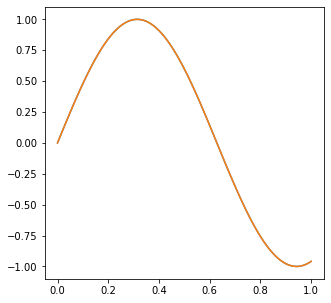

In [96]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))
plt.plot([i/100 for i in range(0, 101)], [f.subs(x, i/100) for i in range(0, 101)])
plt.plot([i/100 for i in range(0, 101)], [f1.subs(x, i/100) for i in range(0, 101)])
plt.show()

In [26]:
f = sp.simplify(sp.sympify(input()))
a = sp.sympify(input())
b = sp.sympify(input())

sqrt(x**2+1)
0
1


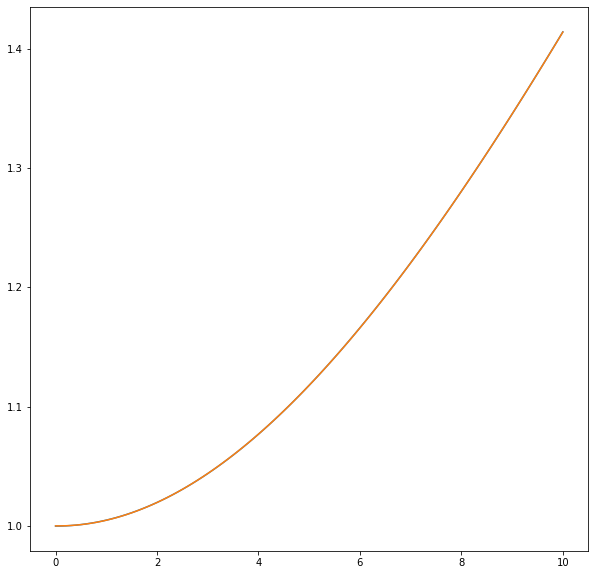

In [17]:
h = []
n = 5

for i in range(n):
    h.append(sp.simplify(sp.integrate(f * Legendre(i, x, (a, b)), (x, a, b))))

f1 = sp.sympify(0)

for i in range(len(h)):
    f1 += h[i] * Legendre(i, x, (a, b))

fig, ax = plt.subplots(figsize=(10, 10))
plt.plot([i/10 for i in range(0, 101)], [f.subs(x, i/100) for i in range(0, 101)])
plt.plot([i/10 for i in range(0, 101)], [f1.subs(x, i/100) for i in range(0, 101)])
plt.show()

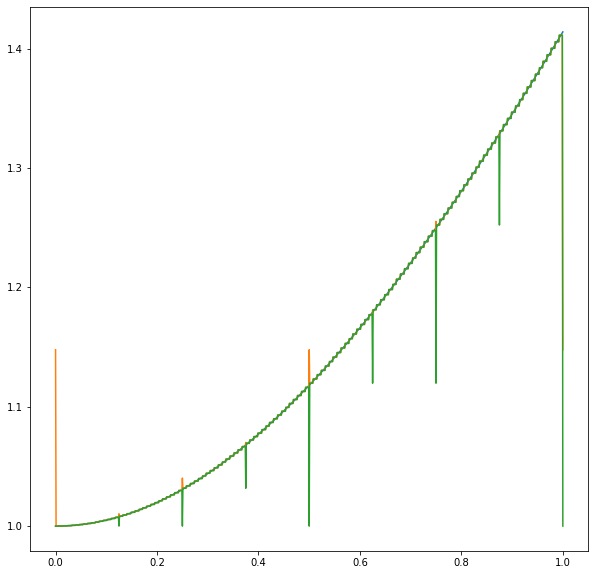

In [18]:
h = []
k = 100

antiderivative = sp.simplify(sp.integrate(f, x))
for i in range(k):
    n = 2**len(bin(i)[:1:-1])
    a = 0
    for j in range(n):
        a += Walsh(i, x).subs(x, (2 * j + 1) / (2 * n)) * (antiderivative.subs(x, (j + 1) / n) - antiderivative.subs(x, j / n))
    h.append(a)

f1 = sp.sympify(0)

for i in range(len(h)):
    f1 += h[i] * Walsh(i, x)
    
f2 = []

for j in range(0, 1001):
    a = 0
    for i in range(len(h)):
        a += h[i] * Walsh_(i, j/1000)
    f2.append(a)
    
fig, ax = plt.subplots(figsize=(10, 10))
plt.plot([i/1000 for i in range(0, 1001)], [f.subs(x, i/1000) for i in range(0, 1001)])
plt.plot([i/1000 for i in range(0, 1001)], [f1.subs(x, i/1000) for i in range(0, 1001)])
plt.plot([i/1000 for i in range(0, 1001)], f2)
plt.show()

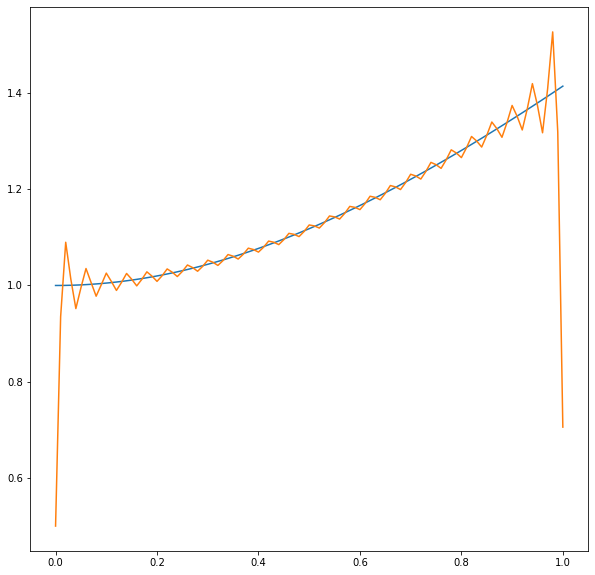

In [28]:
h = []
n = 100

for i in range(n):
    h.append(sp.simplify(sp.integrate(f * trigonometric_functions(i, x, b), (x, a, b))))
    
f1 = sp.sympify(0)

for i in range(len(h)):
    f1 += h[i] * trigonometric_functions(i, x, b)

fig, ax = plt.subplots(figsize=(10, 10))
plt.plot([i/100 for i in range(0, 101)], [f.subs(x, i/100) for i in range(0, 101)])
plt.plot([i/100 for i in range(0, 101)], [f1.subs(x, i/100) for i in range(0, 101)])
plt.show()

In [16]:
antiderivative = sp.simplify(sp.integrate(f, x).doit())
antiderivative

x*sqrt(x**2 + 1)/2 + asinh(x)/2